#### Importação de libs

In [1]:
!pip install pulp
!pip install latexify-py
import math
import latexify
import pulp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 12.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercício 2

# Modelagem

### Quais as variáveis de decisão?

####`x1` => Quantidade de produtos de `P1`
####`x2` => Quantidade de produtos de `P2`
#####***Consideração `x1` e `x2` são variaveis***

### Qual a função objetivo?
#### max Lucro
##### Lucro por `P1`: `100x1` sendo (`100` unidades monetaria X `x1` quantidade de produtos de `P1`)
##### Lucro por `P2`: `150x2` sendo (`150` unidades monetaria X `x2` quantidade de produtos de `P2`)


In [2]:
@latexify.with_latex
def maxLucro(x1, x2):
  return 100*x1 + 150*x2
maxLucro 

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f10d7891dd0>

### Quais as restrições?

#### Restrições tecnicas e Restrições de negatividade

In [3]:
@latexify.with_latex
def restricoes(x1, x2):

  if 1:
    return ((2*x1 + 3*x2) <= 120)
  elif 2:
    return (x1 <= 40)
  elif 3:
    return (x2 <= 30)  
  else:
    return (x2 and x1) >= 0

restricoes  

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f10d78a8290>

Observação: `if n` foi usado para indicar que é uma restrição, sendo `if` a restrição e `n` para indica qual a restrição.
O `otherwise` está sendo usado para indicar restrição de não negatividade
####**Restrições** 


*   Restrição tempo produção => `if 1`
*   Restrição de produção `x1` => `if 2`
*   Restrição de produção `x2` => `if 3`
*   Restrição de não negatividade para `x1` e `x2` => `otherwise`



#Método gráfico
#### Achando os pontos
####### Observação inicializar 0 para as variaveis para encontrar o valor da outras


*   Inicializar 0 para as variaveis para encontrar o valor da outras variaveis
*   Equação da função objetivo encontramos o gradiente que está perpendicular a reta da solução

#### Restrição 2x1 + 3x2 = 120

Quando x1=0 então x2 = ?

2(0) + 3x2 = 120

3x2 = 120

x2 = 120 / 3 = 40

Quando x2 = 0 então x1 = ?

2x1 + 3(0) = 120

2x1 = 120

x1 = 120 / 2 = 60


#### Restrição x1 = 40

#### Restrição x2 = 30

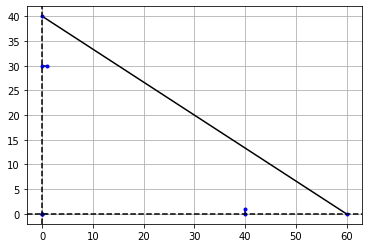

In [4]:
# [x1, y1]
ponto_o = [0, 0] # z = 0
plt.plot(ponto_o)

# Dados retas  

list_values = []
list_values.append([[0, 60], [40, 0]])
list_values.append([[40, 40], [0, 1]])
list_values.append([[0, 1], [30, 30]])

area_de_solucao = [[0], [0]]
list_values.append(area_de_solucao)


def plot_pontos(x1, x2, color):
  plt.plot(x1, x2, color=color)

for x in list_values:
  plot_pontos(x[0], x[1], color='black')
  plt.plot(x[0], x[1], 'b.')
  
plt.fill_between(area_de_solucao[0], area_de_solucao[1])

plt.plot(ponto_o, ponto_o, 'b.')


#plt.legend(['Reta 0'], loc=9)

plt.grid(True)
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')
plt.show()

# Programação

In [5]:
# Definir o modelo
model = pulp.LpProblem('Lista 1 - Exercicio 2', sense=pulp.LpMaximize)

# Adicionar as variáveis
x = pulp.LpVariable.dicts(indices=[1, 2], cat=pulp.LpContinuous, lowBound=0, name='x')

# Adicionar as Restruições
model.addConstraint(2*x[1] + 3*x[2] <= 120, name='restricao_1')
model.addConstraint(x[1] <= 40, name='restricao_2')
model.addConstraint(x[2] <= 30, name='restricao_3')

# Função Objetivo
model.setObjective(100*x[1] + 150*x[2])

# Optimizar
model.solve()

# Obter e imprimir a solução
x_sol = {i: x[i].value() for i in [1, 2]}
print(f'x = {x_sol}')
z = 100*x_sol[1] + 150*x_sol[2]
print(f'z = {z}')

x = {1: 15.0, 2: 30.0}
z = 6000.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
